# Grafy - `networkx`

## Konfiguracja środowiska

0. Python3.12
0. VSCode + plugin: Jupyter 
1. Definiowanie środowiska wirtualnego `venv`
2. Instalacja bibliotek networkx: `pip install networkx[default,extra]`:
  - instaluje `networkx` oraz biblioteki dodatkowe, wymagane: `numpy`, `scipy`, `pandas`, `matplotlib`, ... .
  - instaluje dodatkowe biblioteki (`PyGraphViz`, `pydoot`, `lxml`). Wymagana instalacja `graphviz` lokalnie ([instalacja PyGraphViz](https://pygraphviz.github.io/documentation/stable/install.html))
3. <https://networkx.org/documentation/stable/install.html>

In [173]:
# importowanie biblioteki networkx
import networkx as nx
display(nx.__version__)

'3.3'

In [174]:
# biblioteki umożliwiające prostą wizualizację grafów
import matplotlib.pyplot as plt

Oficjalny [tutorial NetworkX](https://networkx.org/documentation/stable/tutorial.html)

## Definiowanie grafu

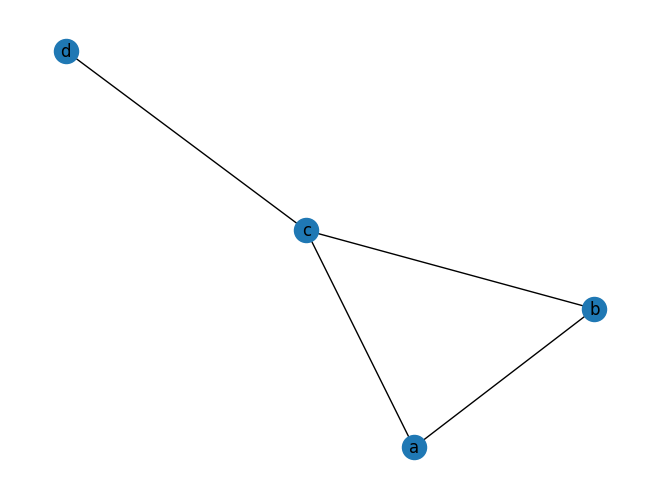

In [175]:
# klasa `Graph` - graf nieskierowany, prosty
G = nx.Graph()

# dodanie pojedynczego węzła o podanej etykiecie
G.add_node('a') 

# dodanie wielu węzłów z obiektu iterowalnego (np. listy)
G.add_nodes_from(['b', 'c'])

# dodanie pojedynczej krawędzi, graf nieskierowany, kolejność nie ma znaczenia
G.add_edge('a', 'b')

# dodanie wielu krawędzi, uzupełnienie brakujących węzłów
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# rysowanie grafu
nx.draw(G, 
        with_labels=True,
        #node_color='blue',
        #node_size=1600,
        #font_color='white',
        #font_size=16,
        )

In [176]:
# parametry grafu
display( G.nodes ) # `nodes` jest property, zwraca iterowalny obiekt `NodeView`
print( f"liczba węzłów: {G.number_of_nodes()}")
print( G.edges )
print( f"liczba krawędzi: {G.number_of_edges()}")

NodeView(('a', 'b', 'c', 'd'))

liczba węzłów: 4
[('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')]
liczba krawędzi: 4


In [177]:
# sąsiedzi węzła
print( G.neighbors('b')) # `neighbors`` zwraca iterator
for v in G.neighbors('b'):
    print(v, end =" ")
print()
print( list(G.neighbors('b')))

a c 
['a', 'c']


`NetworkX` pozwala na dostęp do cech grafu na dwa sposoby:

* jako metody obiektu `Graph`: `G.<method_name>(<arguments>)` lub `G.<property>` - głównie strukturalne cechy grafu
* jako funkcje pakietu/modułu: `nx.<function_name>(G, <arguments>)` - głównie algorytmy grafowe

In [178]:
print( G.degree('b') )
print( nx.degree(G, 'b') )

# print( G.is_tree() ) # nie ma takiej metody
print( nx.is_tree(G) )      # czy jest drzewem
print( nx.is_connected(G) ) # czy jest spójny

2
2
False
True


In [179]:
# przynależność węzła/krawędzi do grafu

print( 'b' in G.nodes )
print( G.has_node('b') )
print( G.has_edge('b', 'a'))
print( ('a', 'b') in G.edges )

True
True
True
True


### Ćwiczenie

Uzupełnij kod funkcji `liscie(G: Graph) -> Iterable` zwracającej sekwencję węzłów grafu nieskierowanego prostego, które są liściami (mają tylko jednego sąsiada).

In [180]:
# Ćwiczenie 1
from typing import Iterable
from networkx import Graph

def liscie(G: Graph) -> Iterable:
    raise NotImplementedError("brak kodu")


In [181]:
# test - ćwiczenie 1
G_test = nx.Graph()
G_test.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])

assert set(liscie(G_test)) == {'c', 'b'}
print(list(liscie(G_test)))

NotImplementedError: brak kodu

## Reprezentacje grafu

In [182]:
# Eksport grafu do macierzy sąsiedztwa

G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1)])

# Macierz sąsiedztwa jako tablica numpy
adj_matrix = nx.to_numpy_array(G1)
print(adj_matrix, end="\n\n")

# Macierz sąsiedztwa jako dataframe pandas
import pandas as pd
adj_matrix = nx.to_pandas_adjacency(G1)
print(adj_matrix, end="\n\n")


[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]

     1    2    3
1  0.0  1.0  1.0
2  1.0  0.0  1.0
3  1.0  1.0  0.0



In [183]:
# Eksport grafu do listy sąsiadów

# Iteracja po wierzchołkach z wypisaniem sąsiadów
for node in G.nodes:
    print(f"{node}: {list(G.neighbors(node))}")
print()

# G.adj - wewnętrzna reprezentacja grafu jako property typu AdjacencyView
print( G.adj )
print( type(G.adj) )

# nx.adjacency_data(G) - słownik, przechowujący strukturę grafu
print( nx.adjacency_data(G) )

a: ['b', 'c']
b: ['a', 'c']
c: ['a', 'b', 'd']
d: ['c']

{'a': {'b': {}, 'c': {}}, 'b': {'a': {}, 'c': {}}, 'c': {'a': {}, 'b': {}, 'd': {}}, 'd': {'c': {}}}
<class 'networkx.classes.coreviews.AdjacencyView'>
{'directed': False, 'multigraph': False, 'graph': [], 'nodes': [{'id': 'a'}, {'id': 'b'}, {'id': 'c'}, {'id': 'd'}], 'adjacency': [[{'id': 'b'}, {'id': 'c'}], [{'id': 'a'}, {'id': 'c'}], [{'id': 'a'}, {'id': 'b'}, {'id': 'd'}], [{'id': 'c'}]]}


### Wczytywanie grafu z pliku

1. Lista krawędzi, każda linia zawiera parę etykiet wierzchołków, np. dla pliku `graph.txt`
    ```txt
    1 2
    1 3
    2 3
    2 4
    ```

    polecenie:

    ```python
    G = nx.read_edgelist("graph.txt", nodetype=int)
    ```

2. Macierz sąsiedztwa, każda linia reprezentuje wiersz macierzy, za pomocą `numpy`:

    ```python
    # Wczytanie macierzy z pliku "matrix.txt"
    matrix = np.loadtxt("matrix.txt", dtype=int)

    # Utworzenie grafu z macierzy
    G = nx.from_numpy_matrix(matrix)
    ```

3. Lista sąsiedztwa, każda linia reprezentuje węzeł i jego sąsiadów:
    ```python
    # Wczytanie listy sąsiedztwa z pliku "adj_list.txt"
    adj_list = {}
    with open("adj_list.txt", "r") as f:
        for line in f:
            node, neighbors = line.strip().split(":")
            adj_list[int(node)] = [int(n) for n in neighbors.split()]

    # Utworzenie grafu z listy sąsiedztwa
    G = nx.from_dict_of_lists(adj_list)
    ```

4. Format GML ([_Graph Modeling Language_](https://en.wikipedia.org/wiki/Graph_Modelling_Language))
    ```python
    G = nx.read_gml("graph.gml")
    ```

5. Inne: `read_weighted_edgelist`, `read_adjlist`, ... --> dokumentacja

### Zapisywanie grafu do pliku tekstowego

* `write_edgelist`, `write_adjlist`, `write_gml`, ... -> dokumentacja

### Ćwiczenie 2

Wykonaj eksperymenty z wczytywaniem i zapisywaniem grafów do plików tekstowych, w różnych formatach

## Graf skierowany (_digraph_)

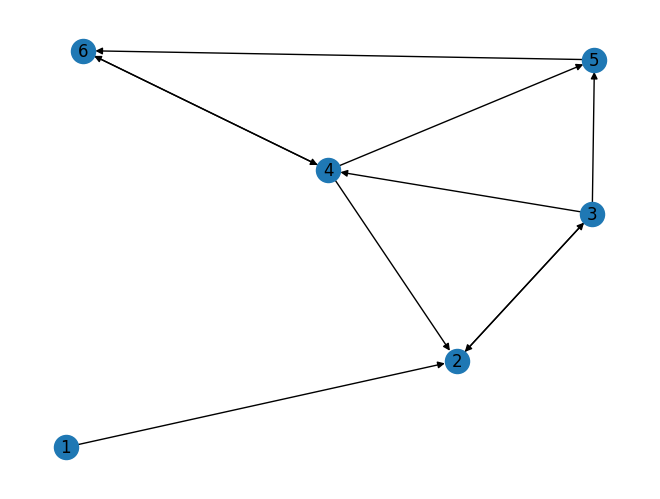

In [184]:
D = nx.DiGraph() # graf skierowany, nieważony
D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])
nx.draw(D, with_labels=True)

In [185]:
print('Następniki dla 2:', list(D.successors(2)), "liczba: ", D.out_degree(2))
print('Poprzedniki dla 2:', list(D.predecessors(2)), "liczba: ", D.in_degree(2))
print( "Wierzchołki i ich stopnie: ", D.degree )
print("Sąsiedzi dla 2: ", list(D.neighbors(2)))

Następniki dla 2: [3] liczba:  1
Poprzedniki dla 2: [1, 3, 4] liczba:  3
Wierzchołki i ich stopnie:  [(1, 1), (2, 4), (3, 4), (4, 5), (5, 3), (6, 3)]
Sąsiedzi dla 2:  [3]


## Ścieżki, cykle, spójność

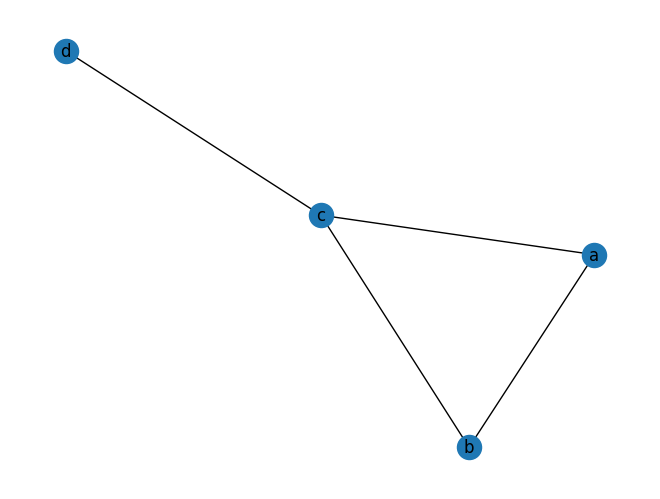

In [186]:
nx.draw(G, with_labels=True)

In [187]:
# ścieżki
print("Czy jest ścieżka od 'a' do 'd':", nx.has_path(G, 'a', 'd') )

print("Ścieżki bez cykli:", list(nx.all_simple_paths(G, 'a', 'd')))
print("Najkrótsza ścieżka:", nx.shortest_path(G, 'a', 'd'), "ma długość:",  nx.shortest_path_length(G, 'a', 'd'))

Czy jest ścieżka od 'a' do 'd': True
Ścieżki bez cykli: [['a', 'b', 'c', 'd'], ['a', 'c', 'd']]
Najkrótsza ścieżka: ['a', 'c', 'd'] ma długość: 2


In [188]:
# spójność
nx.is_connected(G)

True

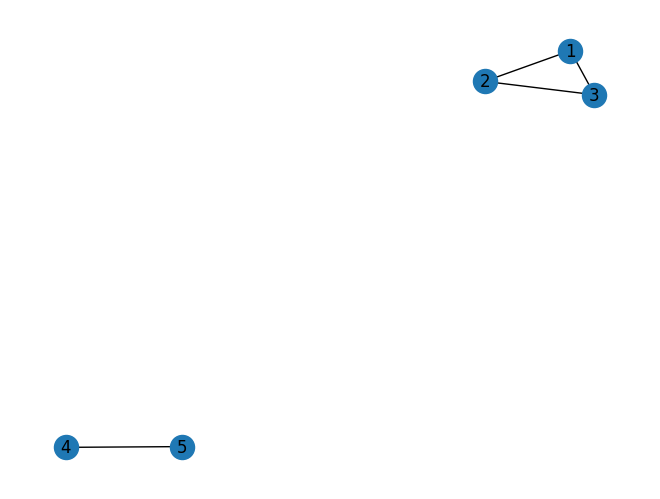

In [189]:
G2 = nx.Graph()

nx.add_cycle(G2, (1,2,3))
G2.add_edge(4,5)

nx.draw(G2, with_labels=True)

False
False
Liczba składowych spójnych: 2
Lista składowych spójnych: [{1, 2, 3}, {4, 5}]
Maksymalna składowa spójna: {1, 2, 3}


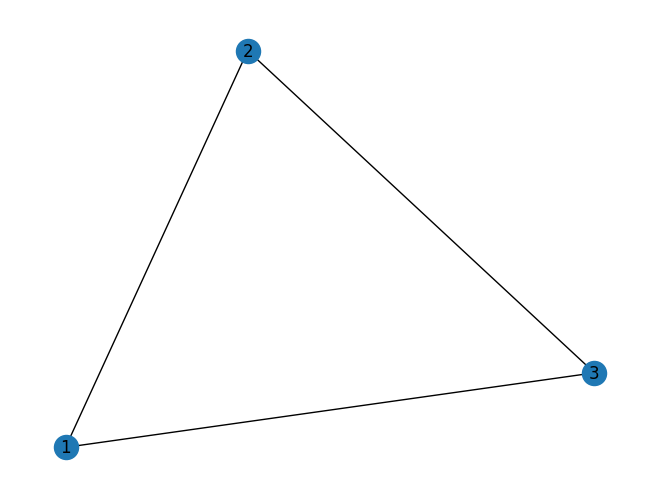

In [190]:
print( nx.is_connected(G2) )
print( nx.has_path(G2, source=3, target=5))
print("Liczba składowych spójnych:", nx.number_connected_components(G2))
print("Lista składowych spójnych:", list(nx.connected_components(G2)))
print("Maksymalna składowa spójna:", max(nx.connected_components(G2), key=len))

# podgraf zbudowany na węzłach maksymalnej składowej spójnej
core_nodes = max(nx.connected_components(G2), key=len)
core = G2.subgraph( core_nodes )
nx.draw(core, with_labels=True)

### Ścieżki i spójność dla grafów skierowanych

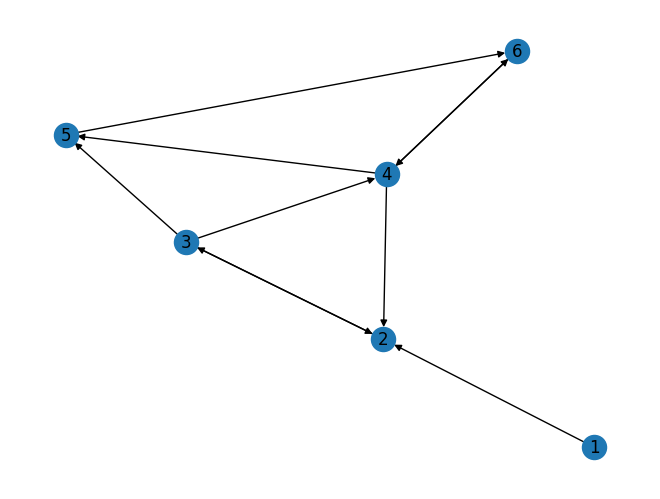

In [191]:
D1 = nx.DiGraph()
D1.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])
nx.draw(D1, with_labels=True)

In [192]:
print(nx.has_path(D1, 1, 4))
print(nx.has_path(D1, 4, 1))

True
False


In [193]:
print(nx.shortest_path(D1, 2, 5))
print(nx.shortest_path(D1, 5, 2))

[2, 3, 5]
[5, 6, 4, 2]


W grafach skierowanych występują dwa rodzaje spójności:

* składowa silnie spójna (ang. _strongly connected_) - z dowolnego wierzchołka możemy dostać się do dowolnego innego wierzchołka, zachowując kierunkowość krawędzi

* składowa słabo spójna (ang. _weakly connected_) - ​​istnieje ścieżka pomiędzy każdą parą węzłów, niezależnie od kierunku

In [194]:
print(nx.is_strongly_connected(D1))
print(list(nx.strongly_connected_components(D1)))

print(nx.is_weakly_connected(D1))
# print(nx.is_connected(D1)) # nie wolno użyć dla grafów skierowanych
print(list(nx.weakly_connected_components(D1)))

False
[{2, 3, 4, 5, 6}, {1}]
True
[{1, 2, 3, 4, 5, 6}]


## Przechodzenie po grafie

* [NetworkX. Traversal. Depth First Search](https://networkx.org/documentation/stable/reference/algorithms/traversal.html#module-networkx.algorithms.traversal.depth_first_search)

* [NetworkX. Traversal. Breadth First Search](https://networkx.org/documentation/stable/reference/algorithms/traversal.html#module-networkx.algorithms.traversal.breadth_first_search)

## Ćwiczenie

Ćwiczenie dotyczy eksploracji grafu połączeń między lotniskami w USA. Wierzchołki grafu etykietowane są kodami [IATA](https://en.wikipedia.org/wiki/List_of_airports_by_IATA_airport_code:_A). W pliku w formacie [GraphML](https://en.wikipedia.org/wiki/GraphML) zapisane są również bezpośrednie połączenia między lotniskami. Zakładamy, że graf jest **nieskierowany**. Dane pochodzą sprzed ok. 8 lat i nie obejmują wszystkich połączeń (są to dane do ćwiczenia).

UWAGA: rozwiązując zadania możesz - na podstawie definicji grafu - opracowywać algorytmy i wykonywać obliczenia. Możesz również eksplorować dokumentację projektu `NetworkX` i odnaleźć dedykowane funkcje.

Postawione pytania mają charakter otwarty. Sposób podejścia do udzielenia odpowiedzi na te pytania zależy od Ciebie.

In [195]:
import networkx as nx
import requests

# URL pliku z opisem grafu
url = "https://raw.githubusercontent.com/URK-KIPLiIS/Python-Data/main/airports/openflights_usa.graphml"

# Pobranie treści pliku z URL
response = requests.get(url)
response.raise_for_status()  # Sprawdzenie, czy pobranie zakończyło się sukcesem

# Wczytanie grafu z pobranej treści, która jest już stringiem
G = nx.parse_graphml(response.text)

# Wyświetlenie grafu
print(G.nodes)
print(G.edges)

G.nodes['IND']

# nx.draw_kamada_kawai(G, with_labels=True)

['RDD', 'EUG', 'IDA', 'MFR', 'RDM', 'OOK', 'ABL', 'BKC', 'ITO', 'OBU', 'ORV', 'WLK', 'KTS', 'CAK', 'HSV', 'PKB', 'MGM', 'TRI', 'PAH', 'KKA', 'SMK', 'SKK', 'TNC', 'AKB', 'PGA', 'FCA', 'MBS', 'BGM', 'KFP', 'NLG', 'KLW', 'KWN', 'HNM', 'KYU', 'SCM', 'BTI', 'NME', 'KKH', 'NIB', 'PSG', 'AIN', 'CIC', 'KUK', 'WNA', 'IRC', 'SFB', 'SLQ', 'JST', 'HKB', 'MLY', 'CLM', 'KWT', 'ELI', 'GLV', 'PSM', 'TLA', 'WAA', 'MSO', 'HVR', 'HHH', 'GRK', 'TVF', 'SGY', 'MLL', 'RBY', 'EGE', 'CSG', 'LAW', 'FLG', 'ANV', 'TWF', 'MVY', 'KVC', 'STC', 'GTR', 'ERI', 'HYA', 'PTH', 'AUK', 'MGW', 'CRW', 'AVP', 'BJI', 'FAR', 'KPN', 'GCC', 'SVA', 'SCE', 'HGR', 'KOT', 'MEI', 'SPI', 'CEZ', 'HDN', 'LBL', 'COD', 'SGF', 'JLN', 'ABE', 'XNA', 'SBN', 'CKB', 'LRD', 'ORH', 'ACV', 'OAJ', 'DBQ', 'GGG', 'PVC', 'KTN', 'GGW', 'OGD', 'PIH', 'PDT', 'LUR', 'PIZ', 'RAP', 'BTT', 'FYU', 'ATK', 'TLJ', 'SNP', 'IGG', 'STG', 'ILI', 'PTU', 'AZA', 'FSM', 'KAL', 'GFK', 'KSM', 'PRC', 'TTN', 'BOS', 'KVL', 'OAK', 'OMA', 'HOT', 'OGG', 'ICT', 'MCI', 'MSN', 'DLG'

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}

### Zadanie 1

Czy jest bezpośredni lot na trasie Indianapolis–Fairbanks na Alasce (FAI)? Lot bezpośredni to taki, w którym nie ma przesiadek.

Gdybym chciał polecieć z Indianapolis do Fairbanks na Alasce, jaki byłby plan obejmujący najmniejszą liczbę przesiadek?

### Zadanie 2

Wyobraź sobie, że chcesz zaplanować podróż samolotem z lotniska w Nowym Jorku (JFK) do lotniska w Los Angeles (LAX). Chcesz znaleźć trasę, która obejmuje co najwyżej 3 przesiadki. Wypisz wszystkie takie trasy.
> Wykorzystaj algorytm BFS do znalezienia tych tras?

### Zadanie 3

Czy można podróżować z dowolnego lotniska w USA na inne lotnisko w USA, ewentualnie korzystając z lotów przesiadkowych? Innymi słowy, czy istnieje ścieżka w sieci pomiędzy każdą możliwą parą lotnisk?


### Zadanie 4 - struktura grafu

* Jaki jest stopień węzła reprezentującego lotnisko w Chicago (ORD)?
* Ile jest węzłów w tym grafie?
* Ile jest krawędzi w tym grafie?
* Jaki jest średni stopień węzła w tym grafie?
* Jaki jest średni dystans między dwoma losowo wybranymi węzłami w tym grafie?
    > Średni dystans ścieżkowy jest ważną miarą w analizie sieci, ponieważ pozwala na ocenę "rozmiaru" sieci i łatwości poruszania się po niej. Im mniejszy średni dystans ścieżkowy, tym bardziej "gęsta" jest sieć i tym łatwiej jest dotrzeć z jednego węzła do drugiego. `nx.average_shortest_path_length` działa tylko dla grafów spójnych. Obliczenie średniego dystansu ścieżkowego może być czasochłonne dla dużych grafów.

### Zadanie 5 - połączenia

* Które lotniska są bezpośrednio połączone z lotniskiem w Los Angeles (LAX)?
* Czy istnieje ścieżka między lotniskiem w Nowym Jorku (JFK) a lotniskiem w San Francisco (SFO)?
* Jaka jest najkrótsza ścieżka między lotniskiem w Miami (MIA) a lotniskiem w Seattle (SEA)?
* Ile jest różnych ścieżek między lotniskiem w Chicago (ORD) a lotniskiem w Denver (DEN)?
* Czy graf połączeń jest spójny, a jeśli nie, ile liczy składowych spójnych?
* Czy istnieją mosty w tym grafie? Jeśli są, to między którymi lotniskami.
* Czy istnieją punkty artykulacji w tym grafie? (Czy usunięcie jakiegokolwiek węzła spowodowałoby rozłączenie grafu?)

**Podpowiedzi:** `nx.bridges`, `nx.articulation_points`, [Most (teoria grafów) @Wikipedia](https://pl.wikipedia.org/wiki/Most_(teoria_graf%C3%B3w)), [Punkt artykulacji @Wikipedia](https://pl.wikipedia.org/wiki/Punkt_artykulacji)

### Zadanie 6 - analiza

* Które lotniska są najbardziej centralne w sieci połączeń lotniczych w USA?
* Które lotniska są najbardziej izolowane w sieci połączeń lotniczych w USA?
* Czy istnieją skupiska lotnisk, które są silnie ze sobą połączone?

> **Podpowiedzi**: Możesz użyć funkcji `nx.degree_centrality`, `nx.betweenness_centrality`, `nx.closeness_centrality` i innych funkcji NetworkX do analizy centralności węzłów.
> [Graph centrality @Wikipedia](https://en.wikipedia.org/wiki/Centrality)
> 

### Zadanie 7 - zaawansowane, otwarte

* Jakie są główne skupiska lotnisk w USA?
* Jakie są cechy charakterystyczne tych skupisk?
* Jakie są powiązania między skupiskami?

* Jakie lotniska są kluczowe dla funkcjonowania sieci połączeń lotniczych w USA?
* Jakie są konsekwencje usunięcia konkretnego lotniska z sieci?
* Jakie są konsekwencje usunięcia konkretnej linii lotniczej z sieci?

**Podpowiedzi:** 
- Możesz użyć funkcji `nx.community.greedy_modularity_communities` do analizy skupisk - zwraca ona listę węzłów należących do danego skupiska.

- Aby ocenić siłę połączeń między skupiskami lotnisk, możemy zastosować kilka miar:
    1. Liczba krawędzi między skupiskami:
    
        Najprostszą miarą jest liczba krawędzi łączących węzły z różnych skupisk. Im więcej krawędzi, tym silniejsze połączenie między skupiskami.
    
    2. Gęstość krawędzi między skupiskami:
    
        Możemy obliczyć gęstość krawędzi między skupiskami, dzieląc liczbę krawędzi między skupiskami przez liczbę wszystkich możliwych krawędzi między nimi. Im wyższa gęstość, tym silniejsze połączenie.
    
    3. Centralność krawędzi:
    
        Możemy użyć miary centralności krawędzi (ang. edge betweenness centrality) do oceny, jak często dana krawędź leży na najkrótszych ścieżkach między węzłami z różnych skupisk. Im wyższa centralność krawędzi, tym ważniejsza jest ta krawędź dla połączenia między skupiskami.
    
    4. Przepływ ruchu lotniczego:
    
        Jeśli mamy dane o przepływie ruchu lotniczego (np. liczba pasażerów na danej trasie), możemy użyć tych danych do oceny siły połączeń między skupiskami. Im większy przepływ ruchu lotniczego między skupiskami, tym silniejsze połączenie.
    
    Przykładowe implementacje w NetworkX:
    
    * **Liczba krawędzi**: Możemy iterować po wszystkich krawędziach grafu i zliczać krawędzie łączące węzły z różnych skupisk.
    * **Gęstość krawędzi**: Możemy obliczyć liczbę wszystkich możliwych krawędzi między skupiskami i podzielić ją przez liczbę istniejących krawędzi.
    * **Centralność krawędzi**: Możemy użyć funkcji `nx.edge_betweenness_centrality` do obliczenia centralności krawędzi.
    * **Przepływ ruchu lotniczego**: Jeśli mamy dane o przepływie ruchu lotniczego, możemy je zsumować dla krawędzi łączących skupiska.